In [110]:
import numpy as np 
import pandas as pd 

1. **Prepare data**: Identify the features and label in a dataset. Pre-process, or clean and transform, the data as needed.
2. **Train model**: Split the data into two groups, a training and a validation set. **Train a machine learning model using the training data set**. Test the machine learning model for performance using the validation data set.
3. **Evaluate performance**: Compare how close the model's predictions are to the known labels.
4. **Deploy a predictive service**: After you train a machine learning model, you can deploy the model as an application on a server or device so that others can use it.

Regression is a form of machine learning used to understand the relationships between variables to predict a desired outcome. Regression predicts a numeric label or outcome based on variables, or features.

In [111]:
df=pd.read_csv("HousingData.csv")

In [112]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Data Preprocessing

In [113]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [114]:

# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per 10,000usd
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT % lower status of the population

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Detect missing values.

In [116]:
# isna->DataFrame.isna()

# Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values.

df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [117]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [118]:
df.duplicated().sum()


0

In [119]:
#correlation between cols?
df.corr()['CRIM']

CRIM       1.000000
ZN        -0.191178
INDUS      0.401863
CHAS      -0.054355
NOX        0.417130
RM        -0.219150
AGE        0.354342
DIS       -0.374166
RAD        0.624765
TAX        0.580595
PTRATIO    0.281110
B         -0.381411
LSTAT      0.444943
MEDV      -0.391363
Name: CRIM, dtype: float64

In [120]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

#  Data visulaization

(array([  6.,  59., 328.,  91.,  22.]),
 array([3.561 , 4.6048, 5.6486, 6.6924, 7.7362, 8.78  ]),
 <BarContainer object of 5 artists>)

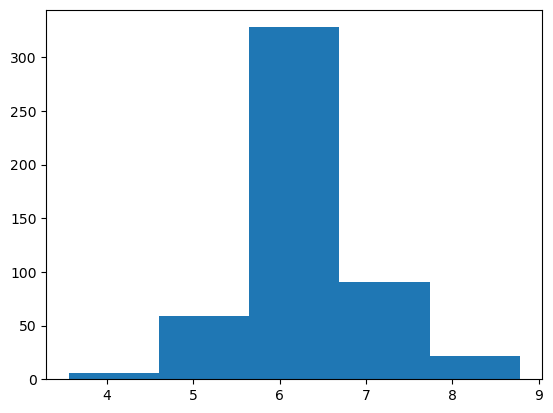

In [121]:
# RM - average number of rooms per dwelling
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.hist(df['RM'],bins=5)

<AxesSubplot:xlabel='RM'>

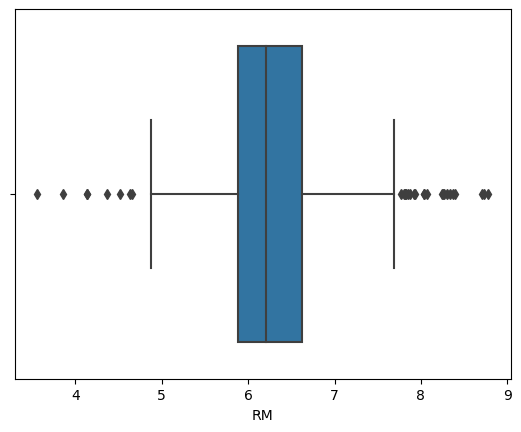

In [122]:
sns.boxplot(df['RM'])

In [123]:
correlation_matrix = df.corr()

In [124]:
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE   
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342  \
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 

Text(0.5, 1.0, 'Correlation Heatmap')

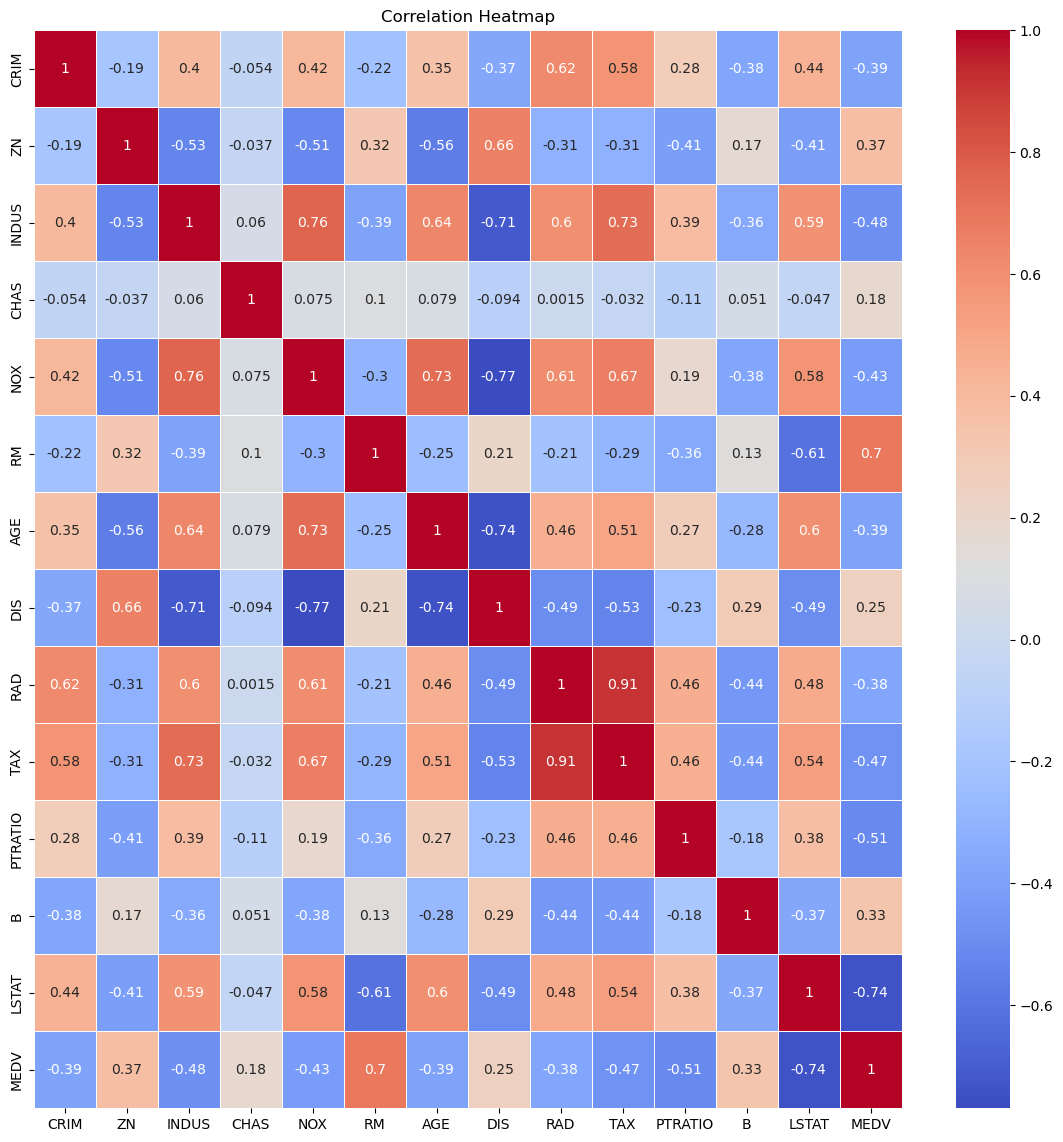

In [125]:
# sns.heatmap(pd.crosstab(df['CRIM'],df['MEDV']))
plt.figure(figsize=(14, 14))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')


**Know The PLOTS**

A line plot is a graph that shows the relationship between two variables by connecting the data points with a line. The x-axis is usually the independent variable, and the y-axis is the dependent variable.

The distplot() function in Seaborn plots the distribution of a univariate dataset. It combines a histogram with a kernel density estimate (KDE).Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. It does this by placing a kernel, which is a weighting function, over each data point and then averaging the kernels.


A box plot is a graphical way of displaying the distribution of numerical data. It shows the five-number summary of the data: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
Here are some of the things that can be inferred from a box plot:
The shape of the distribution: A symmetric distribution will have a box that is roughly centered around the median, with whiskers that are roughly equal in length. A skewed distribution will have a box that is not centered around the median, and the whiskers may be of different lengths.
The spread of the distribution: The wider the box, the more spread out the data is.
The presence of outliers: Outliers are data points that fall outside the whiskers. They can be caused by errors in data collection or by unusual observations.



A pair plot is a type of scatter plot that shows the relationship between all pairs of variables in a dataset. It is a useful tool for exploring the relationships between variables and identifying potential correlations.


A heatmap is a data visualization technique used to represent a matrix of data values as a grid of colored squares. It is particularly useful for visualizing relationships and patterns in data, such as correlations or variations in a dataset. 



In [126]:
df.corr()['TAX']

CRIM       0.580595
ZN        -0.312371
INDUS      0.731055
CHAS      -0.032304
NOX        0.668023
RM        -0.292048
AGE        0.509114
DIS       -0.534432
RAD        0.910228
TAX        1.000000
PTRATIO    0.460853
B         -0.441808
LSTAT      0.536110
MEDV      -0.468536
Name: TAX, dtype: float64

In [127]:
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)

In [128]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

> There are 20 missing values in the CRIM, ZN, INDUS, CHAS, AGE, and LSTAT columns.
> Even though this is less and 5% of the total number of rows, we  still going fill these rows using the mean value to preserve the data as we only have 506 rows to work with.
> 


# **Filling MISSING VALUES**

In [129]:

from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

features_to_impute = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
df[features_to_impute] = mean_imputer.fit_transform(df[features_to_impute])

In [130]:
features_to_impute = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [131]:
df.shape

(506, 14)

In [132]:
desc = df.describe().round(2)
desc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.21,11.08,0.07,0.55,6.28,68.52,3.80,9.55,408.24,18.46,356.67,12.72,22.53
std,8.55,22.92,6.70,0.25,0.12,0.70,27.44,2.11,8.71,168.54,2.16,91.29,7.01,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.92,2.10,4.00,279.00,17.40,375.38,7.23,17.02
50%,0.29,0.00,9.90,0.00,0.54,6.21,74.45,3.21,5.00,330.00,19.05,391.44,12.00,21.20
75%,3.61,11.21,18.10,0.00,0.62,6.62,93.57,5.19,24.00,666.00,20.20,396.22,16.57,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


#  FINDING  outliers

In [133]:

#Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

MEDV_Q3 = desc['PRICE']['75%']
MEDV_Q1 = desc['PRICE']['25%']
MEDV_IQR = MEDV_Q3 - MEDV_Q1
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR

df[df['PRICE']<MEDV_LV]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [134]:
df.to_csv('NewHousingData.csv', index=False)

In [135]:
# Spliting target variable and independent variables
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [136]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [137]:
y_train

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: PRICE, Length: 379, dtype: float64

In [138]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
418     8.8
117    19.2
42     25.3
322    20.4
347    23.1
Name: PRICE, Length: 127, dtype: float64

# Linear regression

In [139]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Train the model using the training sets 
lr.fit(X_train, y_train)

LinearRegression()

In [140]:
lr.intercept_

27.451863212802365

In [141]:

coeffcients = pd.DataFrame([X_train.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

#RM and TAX-as more room so Price high 

,Attribute,Coefficients
0,CRIM,-0.125504
1,ZN,0.026491
2,INDUS,-0.020849
3,CHAS,3.248168
4,NOX,-15.070838
5,RM,4.703502
6,AGE,-0.023007
7,DIS,-1.466712
8,RAD,0.214419
9,TAX,-0.008341


# Model Evaluation

In [142]:
# Model prediction on train data on training DATA
y_pred = lr.predict(X_train)
y_actual=y_train

In [143]:
# Model Evaluation
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
r2 = r2_score(y_actual, y_pred)
mse=mean_squared_error(y_actual, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'r-squared: {r2:.2f}')

Mean Squared Error (MSE): 23.25
r-squared: 0.74


* R2 - It is a value between 0 and 1, where 0 means that the model does not explain any of the variance,
 and 1 means that the model perfectly explains the variance. 
 
* MSE-. It measures the average of the squared differences between predicted and true values, and a lower MSE indicates better model performance.
However, it's important to consider its sensitivity to outliers

In [144]:
y_pred

array([33.68390738, 20.50481485, 38.94209463, 14.62783164, 25.93671766,
       17.71754045, 20.97974467, 10.34959129, 20.13722444, 22.63743938,
       31.56763308, 31.43084216, 15.6779981 , 17.10602005, 28.53691702,
       24.53484718, 17.40259275,  6.68123308, 25.94565443, 23.02135111,
       20.42120985, 13.84131637, 41.02822387, 16.04123281, 17.85656915,
       25.35742894, 23.55187035, 22.28630135, 21.27882797, 16.56449851,
       22.17894967, 29.34551538,  6.70367594, 24.85370438, 17.02662851,
       21.71183982, 25.15734247, 27.52485174, 21.31046416, 41.36683261,
       18.61950878, 15.27638025, 19.28621068, 16.94623418, 22.89377268,
       23.39573965, 32.96604169, 22.40478157, 20.87727156, 25.29465338,
       31.56028813, 33.13515394, 28.30742422,  9.05031988,  5.81693448,
       17.9327296 , 20.02148921, 31.64993438, 33.68858969, 15.6303533 ,
        4.61977889, 32.30280244, 21.71148756, 18.66221934, 25.53016139,
       18.6417365 , 18.44839417, 11.73860167, 31.13529665, 24.95

A confusion matrix is typically used for classification problems, where you have discrete class labels as the target variable.
The Boston Housing dataset is a regression problem, not a classification problem, so a confusion matrix isn't directly applicable to it.

# Model prediction on train data on test DATA

In [145]:
# Model prediction on train data on test DATA
y_pred = lr.predict(X_test)
y_actual_test=y_test

In [146]:
# Model Evaluation
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
r2 = r2_score(y_actual_test, y_pred)
mse=mean_squared_error(y_actual_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'r-squared: {r2:.2f}')

Mean Squared Error (MSE): 22.41
r-squared: 0.68


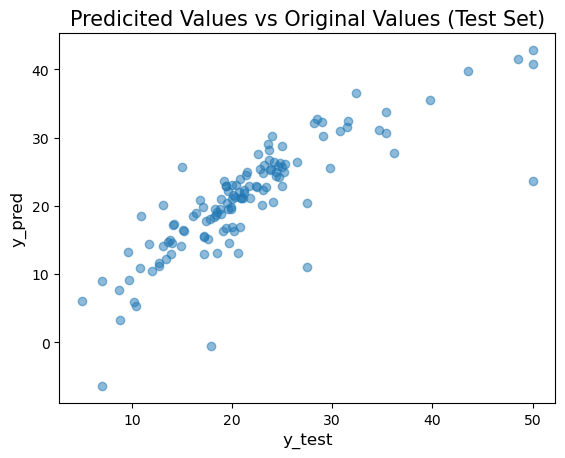

In [147]:
plt.scatter(x=y_actual_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()